In [1]:
import glob

from pathlib import Path
from tqdm import tqdm

import annotation_utils

/home/ltindall/.pyenv/versions/3.10.9/envs/rfml-dev/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [36]:
def foo(a=None, b=None, c=None, d=None):
    print(a)
    print(b)
    print(c)
    print(d)
param = {}#{'b':2, 'c':3, 'd':4}
foo(a = 1, **param)

1
None
None
None


In [40]:
400/16

25.0

In [39]:
2*2*2*2

16

In [27]:
annotation = "1 0.49560546875 0.3544921875 0.201484375 0.05578125"
annotation_split = annotation.split(" ")
w = float(annotation_split[-2])
h = float(annotation_split[-1]) 
new_w = w
new_h = h
if h * w < 0.1:
    mult_const = np.sqrt(0.1/(w*h))
    new_w = mult_const * w
    new_h = mult_const * h
    if new_w > 1:
        new_w = 1.0
        new_h = 0.1

new_annotation = f"{annotation_split[0]} {annotation_split[1]} {annotation_split[2]} {new_w} {new_h}"
print(new_annotation)
    

1 0.49560546875 0.3544921875 0.6010028966591734 0.16638854913324924


In [2]:
s3_data = {
    "anom_wifi": [
        # "data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/anom*.sigmf-meta",
    ],
    "wifi": [
        # "data/gamutrf/gamutrf-sd-gr-ieee-wifi/test_offline/wifi*.sigmf-meta",
        "data/gamutrf/gamutrf-nz-nonanon-wifi/wifi-encoding-6-sendsps-10000000.s16.zst.sigmf-meta",
    ],
}

        

  0%|                                                                                                                                                                                                                                                                | 0/1 [00:00<?, ?it/s]


Loaded 
 Data file: data/gamutrf/gamutrf-nz-nonanon-wifi/wifi-encoding-6-sendsps-10000000.s16.zst.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-nz-nonanon-wifi/wifi-encoding-6-sendsps-10000000.s16.zst.sigmf-meta

Error: Cannot read beyond EOF.
np.max(avg_pwr_db)=-47.9807026638734
np.mean(avg_pwr_db)=-62.09306906341323
median absolute deviation threshold = -60.497820105321566
using threshold = -60.497820105321566


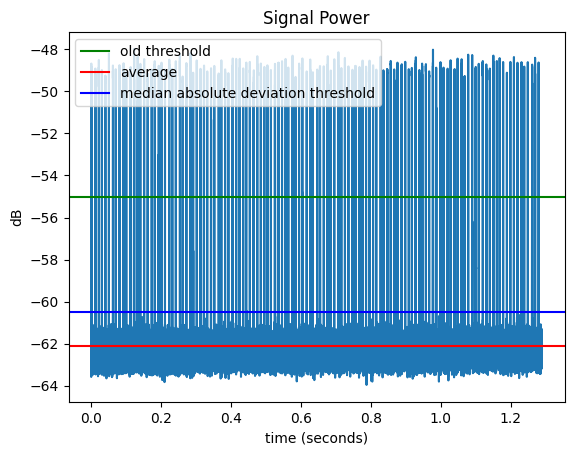


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.44s/it]

Writing 128 annotations to data/gamutrf/gamutrf-nz-nonanon-wifi/wifi-encoding-6-sendsps-10000000.s16.zst.sigmf-meta


In [3]:
for label in s3_data:
    for data_glob in s3_data[label]:
        for f in tqdm(glob.glob(str(Path(data_glob)))):
            annotation_utils.annotate(f, label=label, avg_window_len=256, avg_duration=3, debug=True)